# Import Library
### คู่มือการติดตั้ง Library

1. **ติดตั้ง Python 3.10.11**
   - ดาวน์โหลด Python 3.10.11 จาก [เว็บไซต์ทางการ](https://www.python.org/downloads/release/python-31011/)
   - ติดตั้ง Python โดยเลือก "Add Python to PATH" ขณะติดตั้ง

2. **สร้าง Virtual Environment (แนะนำ)**
   การใช้ virtual environment จะช่วยแยกสภาพแวดล้อมการทำงานของโปรเจกต์ต่างๆ
   ```bash
   python -m venv myenv
   ```

   จากนั้นให้เปิดใช้งาน virtual environment:
   - **Windows**
     ```bash
     myenv\Scripts\activate
     ```
   - **macOS/Linux**
     ```bash
     source myenv/bin/activate
     ```

3. **ติดตั้ง TensorFlow**
   ก่อนอื่น ให้ติดตั้ง TensorFlow version 2.15.0 โดยใช้คำสั่งต่อไปนี้:
   ```bash
   pip install tensorflow==2.15.0
   ```

4. **ติดตั้ง Library อื่นๆ**
   ให้ติดตั้ง library อื่นๆ ที่คุณต้องการด้วยคำสั่งต่อไปนี้:
   ```bash
   pip install numpy matplotlib pytesseract easyocr opencv-python pyzbar keras-ocr
   ```

5. **ตรวจสอบการติดตั้ง**
   หลังจากติดตั้งเสร็จสิ้น ให้ตรวจสอบว่า library ถูกติดตั้งเรียบร้อยหรือไม่ โดยการเปิด Python interpreter และพิมพ์คำสั่งต่อไปนี้:
   ```python
   import tensorflow as tf
   import numpy as np
   import matplotlib.pyplot as plt
   import pytesseract
   import easyocr
   import cv2
   from pyzbar.pyzbar import decode
   import keras_ocr

   print("TensorFlow version:", tf.__version__)
   ```

   ถ้าทุกอย่างถูกต้อง คุณจะเห็นเวอร์ชันของ TensorFlow แสดงขึ้นมา

In [7]:

   import tensorflow as tf
   import numpy as np
   import matplotlib.pyplot as plt
   import pytesseract
   import easyocr
   import cv2
   from pyzbar.pyzbar import decode
   import keras_ocr

   print("TensorFlow version:", tf.__version__)
  



TensorFlow version: 2.15.0


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
import pytesseract
from pytesseract import Output
import easyocr
import cv2
from pyzbar.pyzbar import decode
from pyzbar import pyzbar
import keras_ocr

# Load Dataset

In [9]:
# กำหนด path ที่เก็บ dataset ของคุณ
# ในที่นี้เป็นที่เก็บโฟลเดอร์ที่มีโฟลเดอร์ย่อย 1 (Cat) และ 2 (Dog)
train_dir = "./dataset/"  # โฟลเดอร์นี้ควรมี subfolders สำหรับรูปภาพที่ใช้ในการฝึกอบรม

# 1. Data Preprocessing and Augmentation

1. **การสร้างอ็อบเจกต์ `ImageDataGenerator`**:
   - `datagen` เป็นตัวแปรที่เก็บอ็อบเจกต์ของ `ImageDataGenerator` ซึ่งจะใช้ในการทำ Data Augmentation และการเตรียมข้อมูลภาพก่อนที่จะนำไปฝึกอบรมโมเดล

2. **Normalization**:
   - `rescale=1./255`: การปรับค่า pixel ของภาพให้มีช่วงค่าระหว่าง 0 ถึง 1 จะช่วยให้โมเดลเรียนรู้ได้เร็วขึ้นและมีประสิทธิภาพมากขึ้น เนื่องจากช่วยลดปัญหาในการคำนวณและทำให้การเรียนรู้ของโมเดลเสถียรมากขึ้น

3. **การแบ่งข้อมูล**:
   - `validation_split=0.2`: การแบ่งข้อมูลออกเป็น 2 ส่วน ช่วยให้เรามีข้อมูลสำหรับการฝึกอบรม (70%) และข้อมูลสำหรับการตรวจสอบผล (30%) ซึ่งจำเป็นต่อการประเมินโมเดลว่าทำงานได้ดีเพียงใด

4. **Data Augmentation Techniques**:
   - `horizontal_flip=True`: การพลิกภาพในแนวนอนช่วยเพิ่มความหลากหลายให้กับข้อมูลการฝึกอบรม ทำให้โมเดลไม่เรียนรู้จากลักษณะเฉพาะของภาพที่มีอยู่
   - `rotation_range=20`: การหมุนภาพแบบสุ่มในช่วง 20 องศาเพื่อให้โมเดลสามารถเรียนรู้จากมุมมองที่หลากหลาย
   - `width_shift_range=0.2` และ `height_shift_range=0.2`: การเลื่อนภาพช่วยให้โมเดลเรียนรู้จากตำแหน่งที่แตกต่างกัน
   - `shear_range=0.2`: การใช้การเปลี่ยนรูปแบบ shear ทำให้ภาพมีลักษณะใหม่ๆ
   - `zoom_range=0.2`: การซูมเข้า-ออกช่วยให้โมเดลเรียนรู้จากขนาดที่แตกต่างกัน
   - `fill_mode='nearest'`: วิธีนี้จะเติมพื้นที่ว่างที่เกิดจากการเปลี่ยนรูปด้วยค่าพิกเซลที่ใกล้เคียงที่สุด ทำให้ภาพดูต่อเนื่องมากขึ้น

In [10]:
# การทำ Data Augmentation และ Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize ค่า pixel ให้มีค่าตั้งแต่ 0 ถึง 1 เพื่อช่วยให้โมเดลฝึกอบรมได้มีประสิทธิภาพมากขึ้น
    validation_split=0.3,      # แบ่งข้อมูลออกเป็น 2 ส่วน: 70% สำหรับการฝึกอบรม และ 30% สำหรับการตรวจสอบผล (validation)
    horizontal_flip=True,      # สุ่มพลิกภาพในแนวนอน เพื่อเพิ่มความหลากหลายให้กับข้อมูล
    rotation_range=20,         # หมุนภาพแบบสุ่มในช่วง 20 องศา เพื่อสร้างตัวอย่างภาพที่แตกต่างกัน
    width_shift_range=0.2,     # เลื่อนภาพในแนวนอนแบบสุ่มไม่เกิน 20% ของความกว้างภาพ
    height_shift_range=0.2,    # เลื่อนภาพในแนวตั้งแบบสุ่มไม่เกิน 20% ของความสูงภาพ
    shear_range=0.2,           # ใช้การเปลี่ยนรูปแบบ shear โดยสุ่มให้มีค่าไม่เกิน 20%
    zoom_range=0.2,            # ซูมเข้า-ออกในภาพแบบสุ่มไม่เกิน 20%
    fill_mode='nearest'        # ใช้ค่าพิกเซลที่ใกล้เคียงที่สุดเพื่อเติมพื้นที่ว่างที่เกิดจากการเปลี่ยนรูป
)

# 2. Reading the images from the directory
### อธิบายแต่ละส่วน

1. **การโหลดข้อมูลจากไดเร็กทอรี**:
   - ฟังก์ชัน `flow_from_directory` จะช่วยให้เราสามารถโหลดข้อมูลรูปภาพจากไดเร็กทอรีที่มีโครงสร้างจัดระเบียบได้ง่าย
   - รูปภาพในแต่ละคลาสจะถูกจัดเก็บในโฟลเดอร์ย่อย ซึ่งช่วยให้การแยกประเภทข้อมูลทำได้ง่าย

2. **การปรับขนาดภาพ (Resize)**:
   - การปรับขนาดภาพให้เป็น 224x224 พิกเซล เป็นขนาดที่เหมาะสมสำหรับโมเดลเช่น VGG16, ResNet50 และอื่นๆ
   - ขนาดภาพที่สม่ำเสมอช่วยให้โมเดลสามารถประมวลผลได้ง่ายและรวดเร็ว

3. **Batch Size**:
   - การกำหนด batch size เป็น 32 หมายถึงโมเดลจะประมวลผล 32 ภาพในแต่ละครั้ง
   - การใช้ batch size ที่เหมาะสมช่วยให้การฝึกอบรมมีประสิทธิภาพมากขึ้นและลดการใช้หน่วยความจำ

4. **Class Mode**:
   - การกำหนด class_mode เป็น `binary` ระบุว่าเรามีการจำแนกประเภทเป็น 2 คลาส (เช่น Yims และ Other)
   - การกำหนดค่าดังกล่าวจะทำให้โมเดลรู้จักประเภทของข้อมูลที่มันต้องจัดการ

5. **Subset**:
   - การใช้ subset ทำให้เราสามารถแบ่งข้อมูลได้ง่ายระหว่างข้อมูลสำหรับการฝึกอบรมและข้อมูลสำหรับการตรวจสอบ
   - การมีข้อมูลสำหรับการตรวจสอบช่วยให้เราสามารถประเมินประสิทธิภาพของโมเดลได้เมื่อมันถูกฝึกแล้ว

In [11]:
# โหลดข้อมูลการฝึกอบรมจากโฟลเดอร์
train_data = datagen.flow_from_directory(
    train_dir,                   # ใช้ path ของโฟลเดอร์ dataset
    target_size=(224, 224),      # ปรับขนาดภาพเป็น 224x224 พิกเซล
    batch_size=32,               # จำนวนภาพที่ประมวลผลในแต่ละรอบ (batch)
    class_mode='binary',         # กำหนดประเภทการจำแนกเป็นไบนารี ("Yims" หรือ "Other")
    subset='training'            # ระบุข้อมูลนี้สำหรับการฝึกอบรม
)

# โหลดข้อมูลการตรวจสอบจากโฟลเดอร์
validation_data = datagen.flow_from_directory(
    train_dir,                   # ใช้ path ของโฟลเดอร์ dataset
    target_size=(224, 224),      # ปรับขนาดภาพเป็น 224x224 พิกเซล
    batch_size=32,               # จำนวนภาพที่ประมวลผลในแต่ละรอบ (batch)
    class_mode='binary',         # กำหนดประเภทการจำแนกเป็นไบนารี
    subset='validation'          # ระบุข้อมูลนี้สำหรับการตรวจสอบ
)

Found 12250 images belonging to 2 classes.
Found 5248 images belonging to 2 classes.


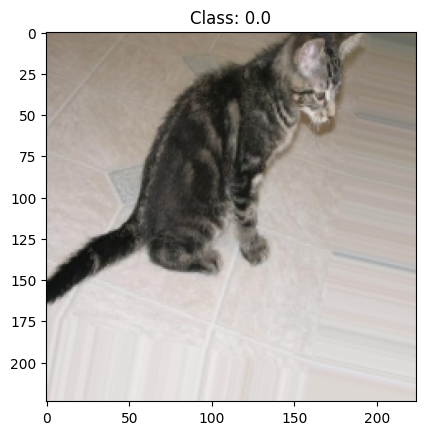

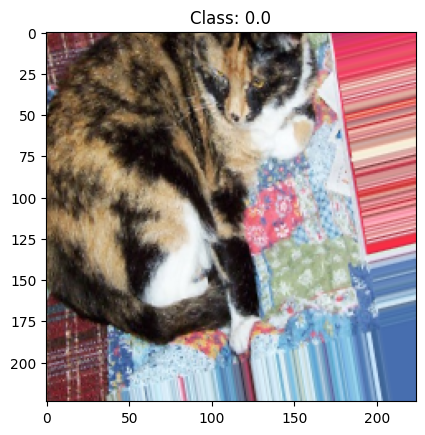

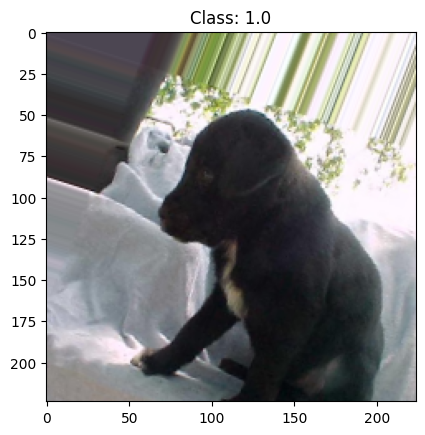

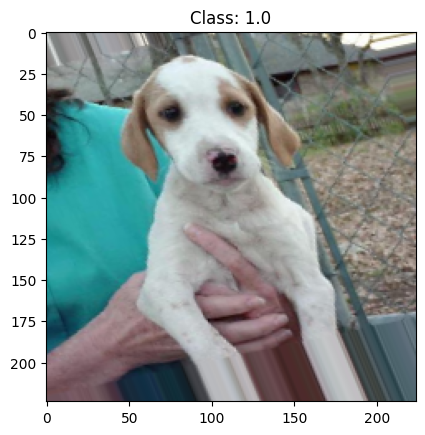

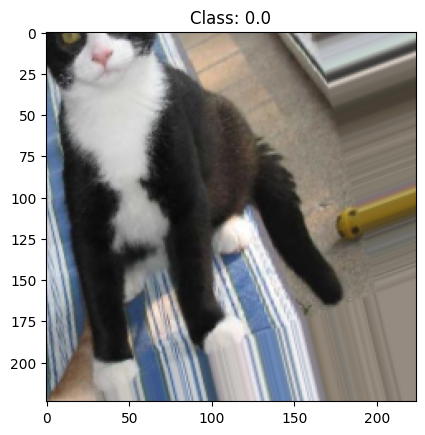

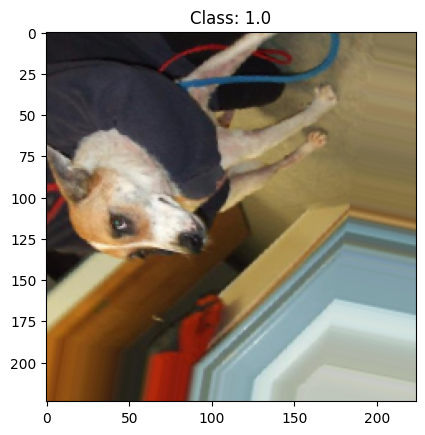

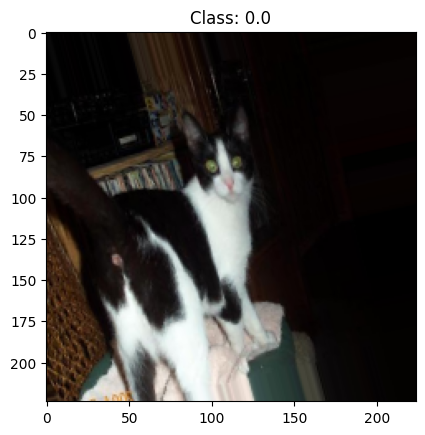

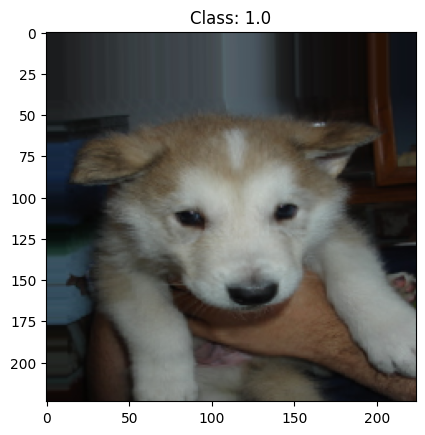

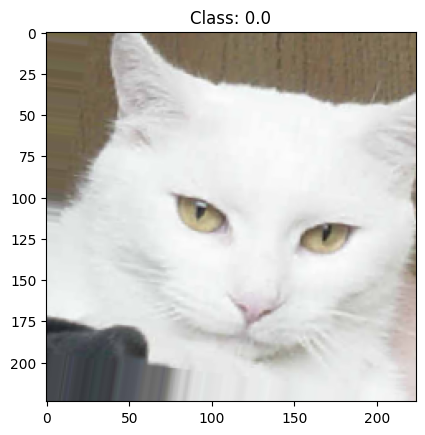

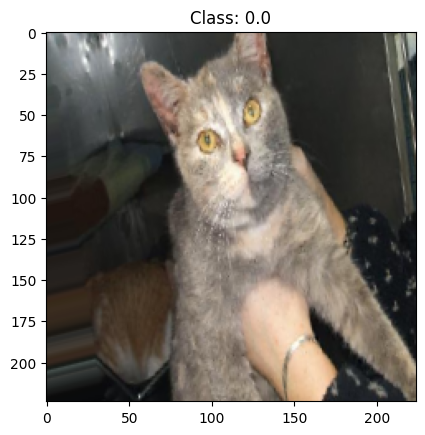

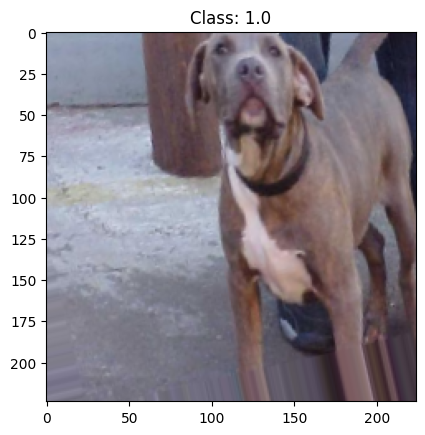

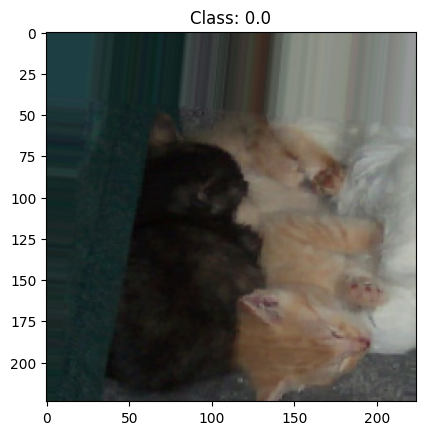

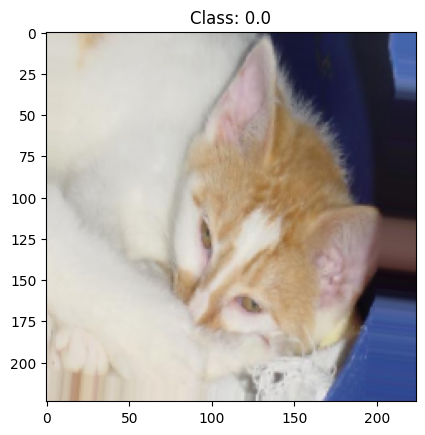

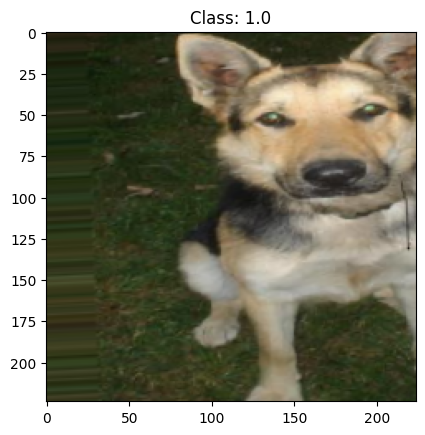

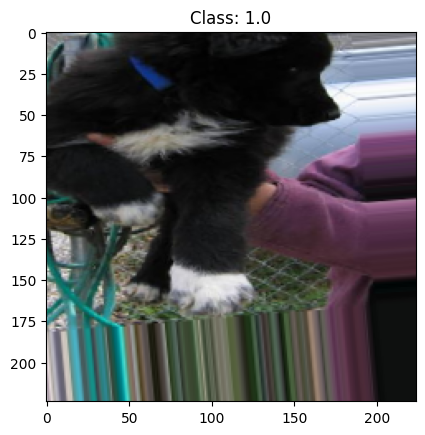

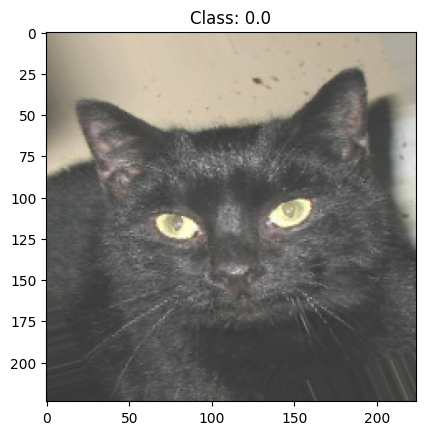

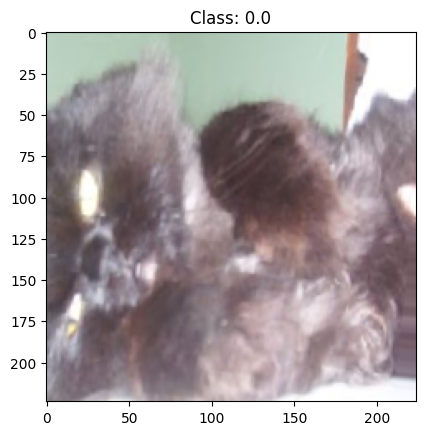

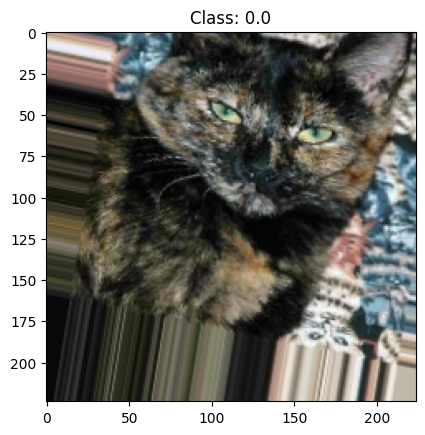

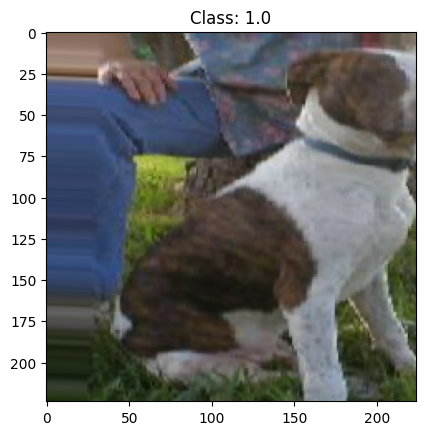

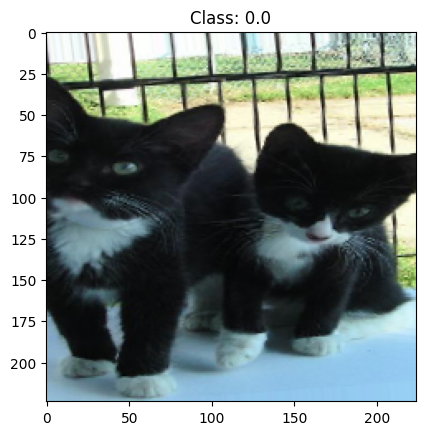

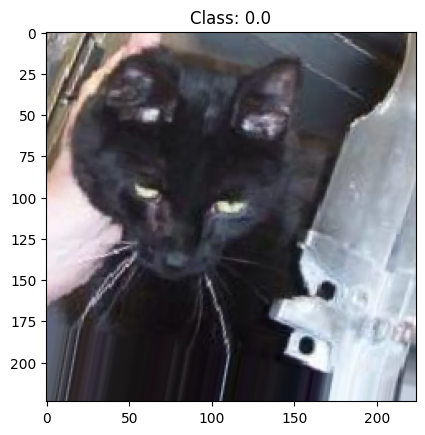

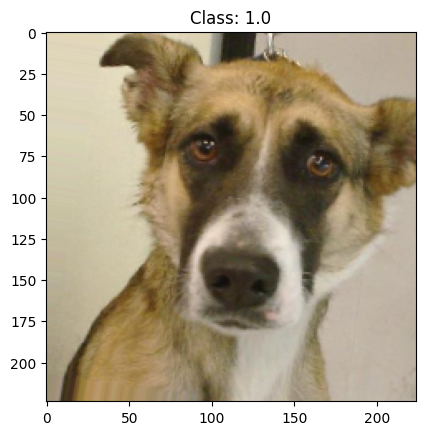

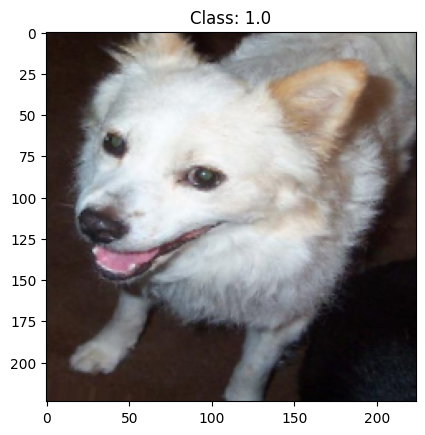

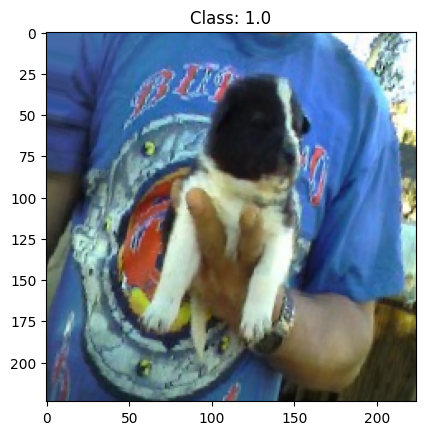

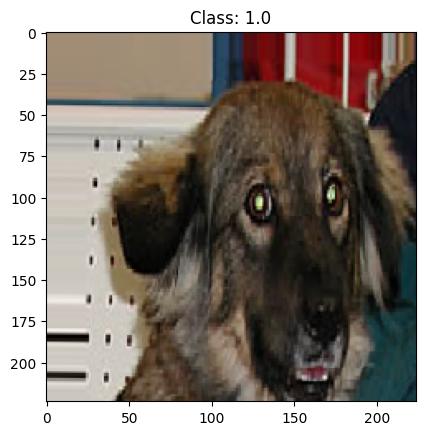

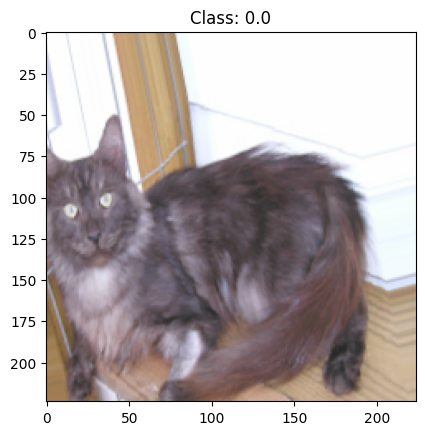

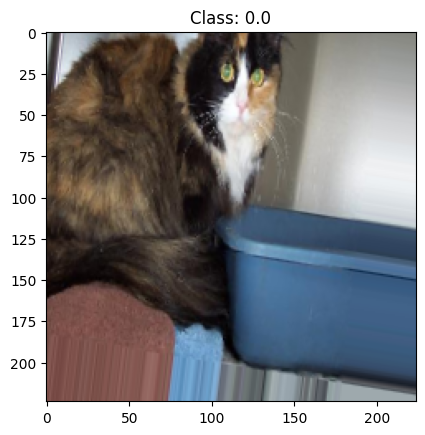

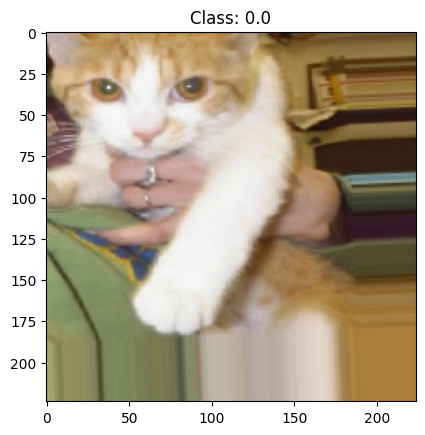

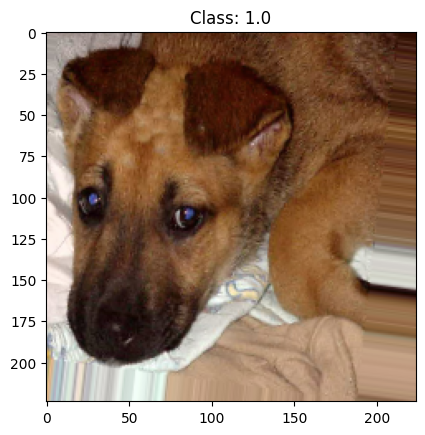

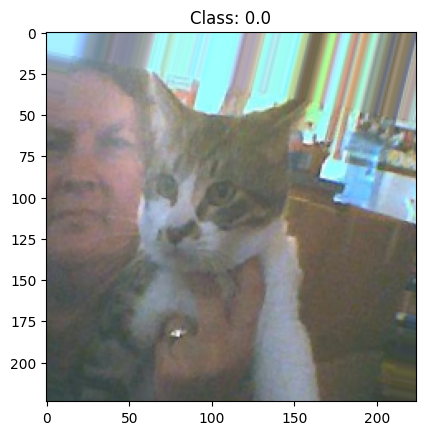

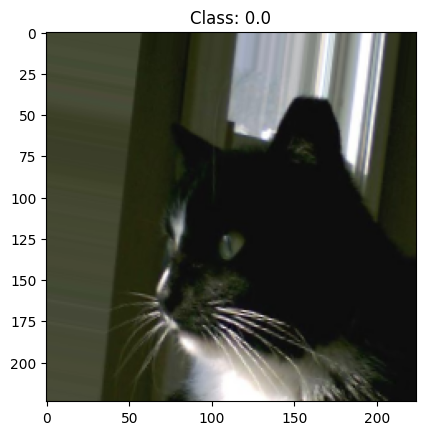

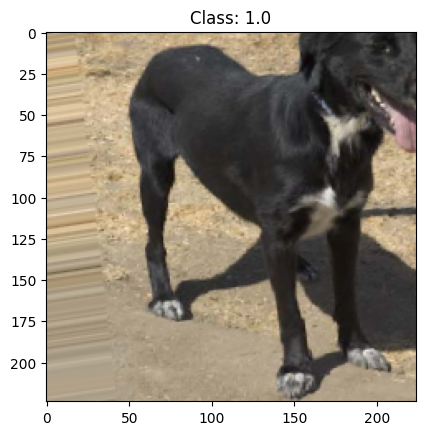

In [12]:
# แสดงภาพจาก training generator
x_batch, y_batch = train_data.next()  # รับข้อมูลภาพและป้ายกำกับ (labels) จาก training generator

for i in range(len(x_batch)):           # ทำซ้ำสำหรับแต่ละภาพใน batch
    plt.imshow(x_batch[i])              # แสดงภาพที่ได้จาก generator
    plt.title('Class: ' + str(y_batch[i]))  # ตั้งชื่อภาพตามป้ายกำกับ (label)
    plt.show()                          # แสดงภาพในหน้าต่าง plot

# 3.1 Model 1: CNN model
1. **การสร้างโมเดล**:
   - `model = Sequential()` สร้างโมเดลแบบอนุกรม ซึ่งเหมาะสำหรับการเชื่อมต่อเลเยอร์ที่เรียงลำดับกัน

2. **เลเยอร์ Convolution**:
   - ใช้ `Conv2D` เพื่อดึงคุณลักษณะจากภาพ โดยเริ่มจากการใช้ฟิลเตอร์ขนาดเล็ก (3x3) เพื่อจับภาพคุณลักษณะพื้นฐาน
   - การเพิ่มจำนวนฟิลเตอร์ในแต่ละเลเยอร์ (32, 64, 128) ช่วยให้โมเดลสามารถเรียนรู้คุณลักษณะที่ซับซ้อนขึ้นได้

3. **เลเยอร์ MaxPooling**:
   - ใช้ `MaxPooling2D` เพื่อลดขนาดข้อมูลและจำนวนพารามิเตอร์ในโมเดล ลดภาระในการประมวลผลและช่วยป้องกัน overfitting

4. **การแปลงข้อมูล (Flatten)**:
   - `Flatten()` แปลงข้อมูลจากเลเยอร์ convolution เป็นเวกเตอร์ 1 มิติ เพื่อใช้เป็นข้อมูลนำเข้าในเลเยอร์ Dense

5. **เลเยอร์ Dense**:
   - ใช้ `Dense` สำหรับการเชื่อมต่อระหว่างนิวรอนทั้งหมด โดยเพิ่มนิวรอนเพื่อให้โมเดลสามารถเรียนรู้และจำแนกประเภทได้

6. **การป้องกัน Overfitting**:
   - `Dropout(0.5)` ลดจำนวนการเชื่อมต่อระหว่างนิวรอนโดยการสุ่มตัดการเชื่อมต่อ 50% ของนิวรอนในระหว่างการฝึกอบรม ซึ่งช่วยให้โมเดลไม่จำกัดตัวเองกับข้อมูลฝึกอบรมมากเกินไป

7. **เลเยอร์ Output**:
   - `Dense(1, activation='sigmoid')` สร้างเลเยอร์ผลลัพธ์สำหรับการจำแนกประเภทไบนารี โดยผลลัพธ์จะอยู่ในช่วง 0 ถึง 1 ซึ่งสามารถตีความได้ว่าเป็นความน่าจะเป็นของการเป็นคลาสใดคลาสหนึ่ง


In [13]:
# สร้างโมเดล Sequential
model = Sequential()  # โมเดลนี้ใช้สำหรับการสร้างเลเยอร์แบบอนุกรม

# First convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  
# เลเยอร์ convolution แรก ใช้ 32 ฟิลเตอร์ขนาด 3x3
# activation='relu' ใช้ฟังก์ชัน ReLU เพื่อเพิ่มความไม่เป็นเชิงเส้น
# input_shape=(224, 224, 3) กำหนดขนาดภาพและจำนวนช่องสี (RGB)

model.add(MaxPooling2D(pool_size=(2, 2)))  
# เลเยอร์ MaxPooling ขนาด 2x2 ช่วยลดขนาดภาพและเก็บคุณลักษณะที่สำคัญ

# Second convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))  
# เลเยอร์ convolution ที่สอง ใช้ 64 ฟิลเตอร์ขนาด 3x3

model.add(MaxPooling2D(pool_size=(2, 2)))  
# เลเยอร์ MaxPooling ขนาด 2x2 อีกครั้งเพื่อลดขนาดและเก็บข้อมูล

# Third convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))  
# เลเยอร์ convolution ที่สาม ใช้ 128 ฟิลเตอร์ขนาด 3x3

model.add(MaxPooling2D(pool_size=(2, 2)))  
# เลเยอร์ MaxPooling ขนาด 2x2 อีกครั้งเพื่อลดขนาด

# Flatten the output
model.add(Flatten())  
# แปลงข้อมูลจากหลายมิติให้เป็นเวกเตอร์ 1 มิติ เพื่อใช้ในเลเยอร์ถัดไป

# Fully connected (Dense) layer
model.add(Dense(128, activation='relu'))  
# เลเยอร์ Dense เชื่อมต่อทั้งหมด มี 128 นิวรอน ใช้ฟังก์ชัน ReLU

model.add(Dropout(0.5))  
# เลเยอร์ Dropout 50% เพื่อป้องกันการเกิด overfitting

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))  
# เลเยอร์ Output ใช้ 1 นิวรอนสำหรับการจำแนกประเภทไบนารี
# ฟังก์ชัน sigmoid ทำให้ผลลัพธ์อยู่ในช่วง 0-1


In [14]:
# 4. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
# คอมไพล์โมเดลเพื่อเตรียมให้พร้อมสำหรับการฝึกอบรม
# optimizer='adam' ใช้ Adam optimizer ที่มีประสิทธิภาพและได้รับความนิยม
# loss='binary_crossentropy' ใช้ฟังก์ชันการสูญเสียแบบไบนารีสำหรับการจำแนกประเภท
# metrics=['accuracy'] ใช้เพื่อติดตามความแม่นยำในระหว่างการฝึกอบรม

# Adjusting steps_per_epoch and validation_steps based on available samples
batch_size = 64  # ปรับขนาด batch ตามความสามารถของระบบ

# Number of steps per epoch (at least 1 step per epoch)
steps_per_epoch = max(1, train_data.samples // batch_size)  
# คำนวณจำนวนขั้นตอนต่อ epoch โดยใช้จำนวนภาพทั้งหมดหารด้วย batch size
# ต้องมีอย่างน้อย 1 ขั้นตอนต่อ epoch เพื่อให้สามารถฝึกอบรมได้

validation_steps = max(1, validation_data.samples // batch_size)  
# คำนวณจำนวนขั้นตอนสำหรับข้อมูลการตรวจสอบ (validation) โดยใช้จำนวนภาพในการตรวจสอบหารด้วย batch size
# ต้องมีอย่างน้อย 1 ขั้นตอนต่อ validation เพื่อให้สามารถตรวจสอบได้

# 5. Train the model with corrected steps_per_epoch
history = model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,    # ค่าที่แก้ไขแล้วสำหรับจำนวนขั้นตอนต่อ epoch
    validation_data=validation_data,
    validation_steps=validation_steps,  # ค่าที่แก้ไขแล้วสำหรับจำนวนขั้นตอนการตรวจสอบ
    epochs=10  # จำนวน epoch สำหรับการฝึกอบรม
)


Epoch 1/10


191/191 [==============================] - 349s 2s/step - loss: 0.7127 - accuracy: 0.5257 - val_loss: 0.6861 - val_accuracy: 0.5697
Epoch 2/10
191/191 [==============================] - 352s 2s/step - loss: 0.6854 - accuracy: 0.5521 - val_loss: 0.6883 - val_accuracy: 0.5583
Epoch 3/10
191/191 [==============================] - 349s 2s/step - loss: 0.6821 - accuracy: 0.5664 - val_loss: 0.6789 - val_accuracy: 0.5781
Epoch 4/10
191/191 [==============================] - 346s 2s/step - loss: 0.6782 - accuracy: 0.5773 - val_loss: 0.8561 - val_accuracy: 0.5282
Epoch 5/10
191/191 [==============================] - 343s 2s/step - loss: 0.6855 - accuracy: 0.5604 - val_loss: 0.6772 - val_accuracy: 0.5850
Epoch 6/10
191/191 [==============================] - 346s 2s/step - loss: 0.6781 - accuracy: 0.5789 - val_loss: 0.6810 - val_accuracy: 0.5716
Epoch 7/10
191/191 [==============================] - 343s 2s/step - loss: 0.6761 - accuracy: 0.5796 - val_loss: 0.6788 - val_accuracy: 0.5

# 3.2 Model 2: VGG16
1. **การสร้างโมเดล VGG16**:
   - `base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))`:
     - สร้างโมเดล VGG16 โดยโหลด weights ที่ได้รับการฝึกฝนจาก ImageNet
     - `include_top=False` หมายความว่าไม่รวมชั้นสุดท้ายของโมเดล VGG16 ซึ่งเป็นชั้นการจำแนกประเภทที่กำหนดไว้ล่วงหน้า
     - `input_shape=(224, 224, 3)` กำหนดขนาดของภาพที่ป้อนเข้ามา

2. **การ Freeze Base Model**:
   - `base_model.trainable = False`:
     - การตั้งค่าโมเดลฐานให้ไม่สามารถปรับน้ำหนักได้ในระหว่างการฝึกอบรม
     - ทำเช่นนี้เพื่อใช้ความรู้ที่ได้จากการฝึกใน ImageNet แทนที่จะฝึกซ้ำอีกครั้ง ซึ่งช่วยให้การฝึกอบรมมีประสิทธิภาพและรวดเร็วขึ้น

In [57]:
def build_vgg16_model():
    # สร้างโมเดล VGG16 โดยใช้ weights ที่เรียนรู้จาก ImageNet
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    # กำหนดให้ base model ไม่สามารถปรับน้ำหนักได้ (freeze)
    base_model.trainable = False  # Freeze the base model

    # สร้างโมเดล Sequential ใหม่ โดยรวม base model และชั้นที่จำเป็นสำหรับการจำแนกประเภท
    model = models.Sequential([
        base_model,  # ใช้ base model VGG16 ที่ freeze แล้ว
        Flatten(),  # แปลงข้อมูล 2D เป็น 1D เพื่อให้สามารถป้อนเข้าสู่ชั้น Dense
        Dense(128, activation='relu'),  # ชั้น Dense ที่มี 128 นิวรอนและใช้ activation function ReLU
        Dropout(0.5),  # Dropout layer เพื่อลดการเกิด overfitting โดยสุ่มปิด 50% ของนิวรอนในชั้นนี้
        Dense(1, activation='sigmoid')  # ชั้น output สำหรับการจำแนกประเภทแบบไบนารี (Yims หรือ Other)
    ])

    # คอมไพล์โมเดลด้วย optimizer Adam และ loss function แบบ binary crossentropy
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    # คืนค่าโมเดลที่สร้างขึ้น
    return model

In [58]:
# Instantiate the VGG16 model
vgg16_model = build_vgg16_model()

# Train VGG16 model
history_vgg16 = vgg16_model.fit(
    train_data,
    steps_per_epoch=max(1, train_data.samples // 32),
    validation_data=validation_data,
    validation_steps=max(1, validation_data.samples // 32),
    epochs=5
)


Epoch 1/5
382/382 [==============================] - 4838s 13s/step - loss: 0.4470 - accuracy: 0.8122 - val_loss: 0.3037 - val_accuracy: 0.8668
Epoch 2/5
382/382 [==============================] - 4823s 13s/step - loss: 0.3206 - accuracy: 0.8560 - val_loss: 0.2682 - val_accuracy: 0.8866
Epoch 3/5
382/382 [==============================] - 4908s 13s/step - loss: 0.3053 - accuracy: 0.8673 - val_loss: 0.2535 - val_accuracy: 0.8916
Epoch 4/5
382/382 [==============================] - 5125s 13s/step - loss: 0.2972 - accuracy: 0.8663 - val_loss: 0.2524 - val_accuracy: 0.8872
Epoch 5/5
382/382 [==============================] - 5156s 14s/step - loss: 0.2762 - accuracy: 0.8813 - val_loss: 0.2262 - val_accuracy: 0.9076


# 3.3 Model 3: ResNet50

In [28]:
def build_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the base model
    model = models.Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification output
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [30]:
# Instantiate the ResNet50 model
resnet50_model = build_resnet50_model()

# Train ResNet50 model
history_resnet50 = resnet50_model.fit(
    train_data,
    steps_per_epoch=max(1, train_data.samples // 32),
    validation_data=validation_data,
    validation_steps=max(1, validation_data.samples // 32),
    epochs=10
)

94765736/94765736 [==============================] - 108s 1us/step
Epoch 1/10
382/382 [==============================] - 1732s 5s/step - loss: 0.7993 - accuracy: 0.4968 - val_loss: 0.6928 - val_accuracy: 0.5011
Epoch 2/10
382/382 [==============================] - 1674s 4s/step - loss: 0.6961 - accuracy: 0.4934 - val_loss: 0.6930 - val_accuracy: 0.5002
Epoch 3/10
382/382 [==============================] - 1668s 4s/step - loss: 0.6964 - accuracy: 0.4957 - val_loss: 0.6930 - val_accuracy: 0.5002
Epoch 4/10
382/382 [==============================] - 1701s 4s/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/10
382/382 [==============================] - 1677s 4s/step - loss: 0.6930 - accuracy: 0.4982 - val_loss: 0.6928 - val_accuracy: 0.5010
Epoch 6/10
382/382 [==============================] - 1646s 4s/step - loss: 0.6961 - accuracy: 0.4974 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 7/10
382/382 [==============================] - 105298s 276s/st

# 3.4 Model 4: InceptionV3

In [31]:
def build_inceptionv3_model():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the base model
    model = models.Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification output
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [33]:
# Instantiate the InceptionV3 model
inceptionv3_model = build_inceptionv3_model()

# Train InceptionV3 model
history_inceptionv3 = inceptionv3_model.fit(
    train_data,
    steps_per_epoch=max(1, train_data.samples // 32),
    validation_data=validation_data,
    validation_steps=max(1, validation_data.samples // 32),
    epochs=5
)

Epoch 1/5
382/382 [==============================] - 1161s 3s/step - loss: 0.3165 - accuracy: 0.9550 - val_loss: 0.0726 - val_accuracy: 0.9748
Epoch 2/5
382/382 [==============================] - 1175s 3s/step - loss: 0.0896 - accuracy: 0.9674 - val_loss: 0.1337 - val_accuracy: 0.9634
Epoch 3/5
382/382 [==============================] - 1190s 3s/step - loss: 0.0868 - accuracy: 0.9678 - val_loss: 0.0623 - val_accuracy: 0.9794
Epoch 4/5
382/382 [==============================] - 1202s 3s/step - loss: 0.0800 - accuracy: 0.9709 - val_loss: 0.0573 - val_accuracy: 0.9777
Epoch 5/5
382/382 [==============================] - 1136s 3s/step - loss: 0.0811 - accuracy: 0.9708 - val_loss: 0.0557 - val_accuracy: 0.9783


# 3.5 Model 5: MobileNetV2

In [19]:
def build_mobilenetv2_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the base model
    model = models.Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification output
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [34]:
# Instantiate the MobileNetV2 model
mobilenetv2_model = build_mobilenetv2_model()

# Train MobileNetV2 model
history_mobilenetv2 = mobilenetv2_model.fit(
    train_data,
    steps_per_epoch=max(1, train_data.samples // 32),
    validation_data=validation_data,
    validation_steps=max(1, validation_data.samples // 32),
    epochs=5
)

9406464/9406464 [==============================] - 15s 2us/step
Epoch 1/5
382/382 [==============================] - 535s 1s/step - loss: 0.3025 - accuracy: 0.9423 - val_loss: 0.0798 - val_accuracy: 0.9668
Epoch 2/5
382/382 [==============================] - 475s 1s/step - loss: 0.1134 - accuracy: 0.9591 - val_loss: 0.0768 - val_accuracy: 0.9716
Epoch 3/5
382/382 [==============================] - 497s 1s/step - loss: 0.1035 - accuracy: 0.9602 - val_loss: 0.0717 - val_accuracy: 0.9703
Epoch 4/5
382/382 [==============================] - 514s 1s/step - loss: 0.0957 - accuracy: 0.9660 - val_loss: 0.0690 - val_accuracy: 0.9728
Epoch 5/5
382/382 [==============================] - 516s 1s/step - loss: 0.0951 - accuracy: 0.9651 - val_loss: 0.0727 - val_accuracy: 0.9726


# 4. Plot the accuracy and loss

In [45]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

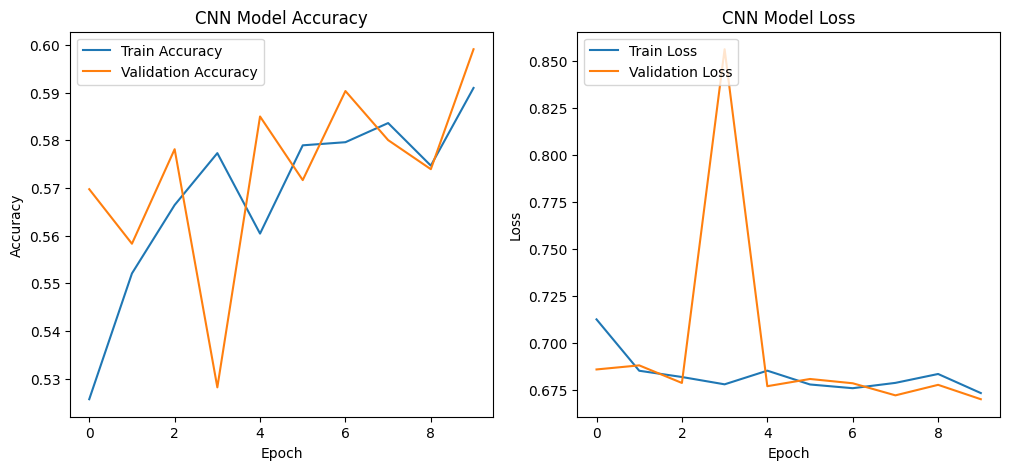

In [46]:
# Example: Plot history for CNN
plot_history(history, 'CNN')

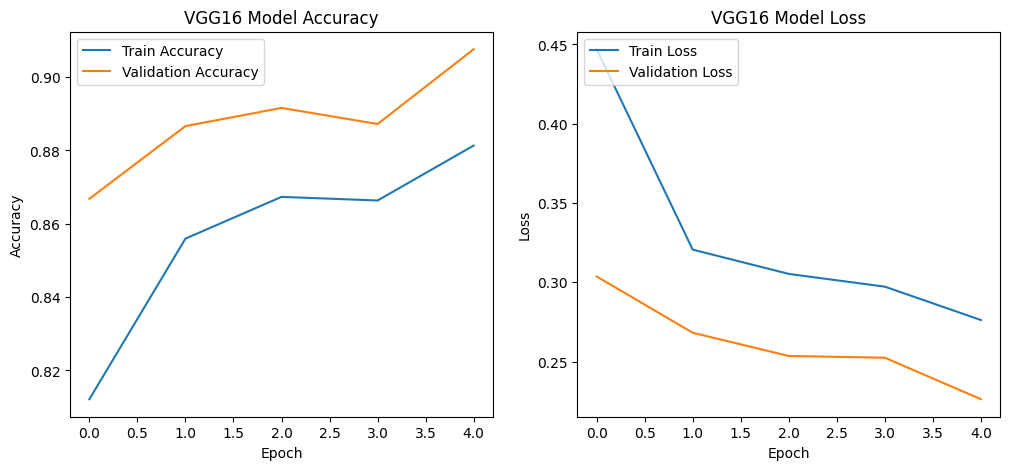

In [59]:
# Example: Plot history for VGG16
plot_history(history_vgg16, 'VGG16')

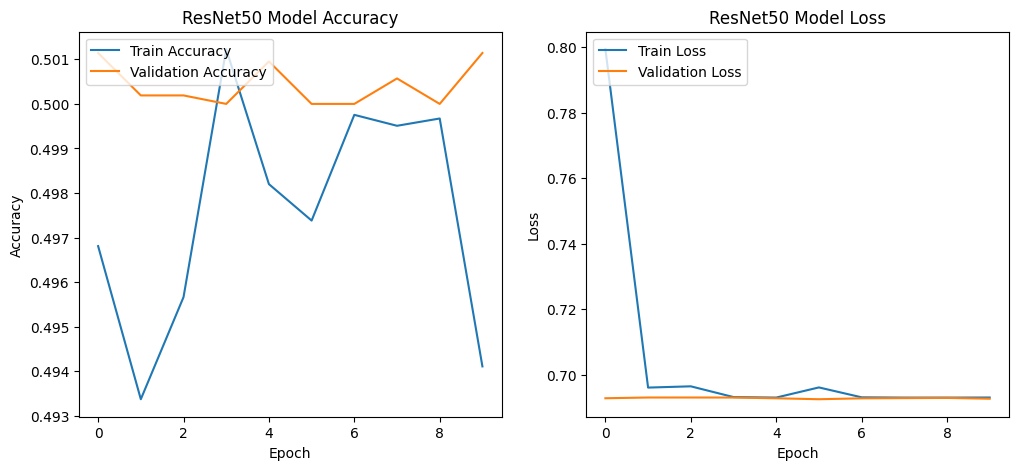

In [48]:
# Example: Plot history for ResNet50
plot_history(history_resnet50, 'ResNet50')

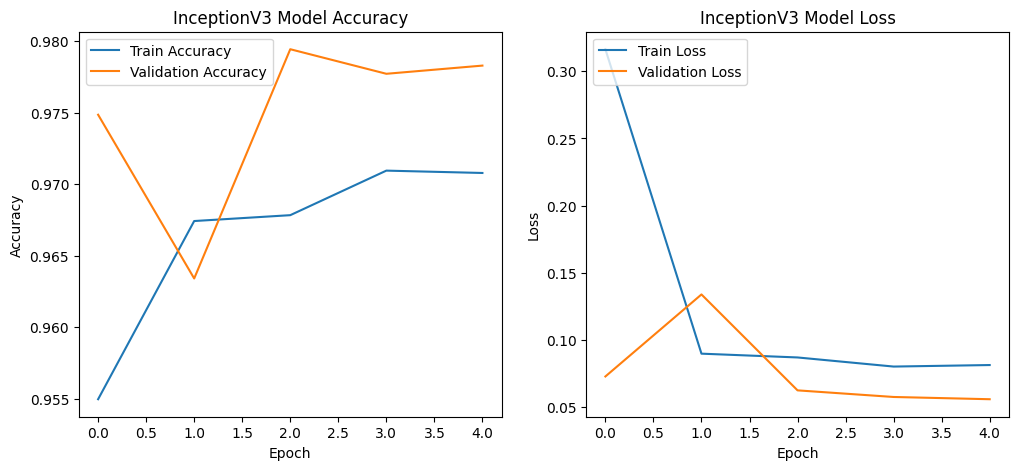

In [49]:
# Example: Plot history for InceptionV3
plot_history(history_inceptionv3, 'InceptionV3')

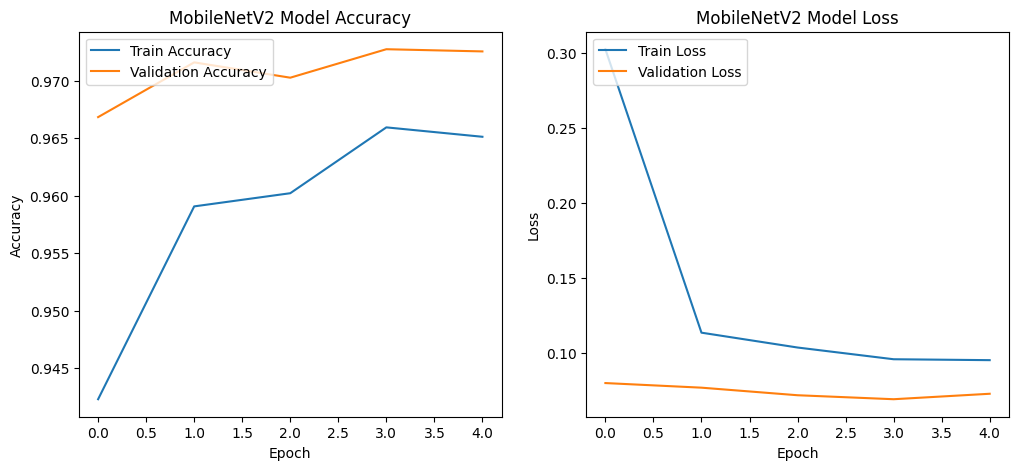

In [50]:
# Example: Plot history for MobileNetV2
plot_history(history_mobilenetv2, 'MobileNetV2')

# 5. Evaluating the model

CNN model Evaluate Score

In [51]:
val_loss, val_acc = model.evaluate(validation_data)
print(f'Validation Accuracy: {val_acc}')

164/164 [==============================] - 113s 683ms/step - loss: 0.6712 - accuracy: 0.5936
Validation Accuracy: 0.5935594439506531


VGG16 model Evaluate Score

In [60]:
val_loss, val_acc = vgg16_model.evaluate(validation_data)
print(f'VGG16 Validation Accuracy: {val_acc}')

164/164 [==============================] - 1551s 9s/step - loss: 0.2267 - accuracy: 0.9045
VGG16 Validation Accuracy: 0.9045350551605225


ResNet50 model Evaluate Score

In [53]:
# Example: Evaluate ResNet50
val_loss, val_acc = resnet50_model.evaluate(validation_data)
print(f'ResNet50 Validation Accuracy: {val_acc}')

164/164 [==============================] - 517s 3s/step - loss: 0.6927 - accuracy: 0.5010
ResNet50 Validation Accuracy: 0.5009527206420898


InceptionV3 model Evaluate Score

In [54]:
# Example: Evaluate InceptionV3
val_loss, val_acc = inceptionv3_model.evaluate(validation_data)
print(f'InceptionV3 Validation Accuracy: {val_acc}')

164/164 [==============================] - 324s 2s/step - loss: 0.0605 - accuracy: 0.9783
InceptionV3 Validation Accuracy: 0.9782774448394775


MobileNetV2 model Evaluate Score

In [55]:
# Example: Evaluate MobileNetV2
val_loss, val_acc = mobilenetv2_model.evaluate(validation_data)
print(f'MobileNetV2 Validation Accuracy: {val_acc}')

164/164 [==============================] - 148s 900ms/step - loss: 0.0599 - accuracy: 0.9735
MobileNetV2 Validation Accuracy: 0.9735137224197388


# 6. Save Model

In [61]:
# Save CNN model
model.save('./model/cnn_model.h5')

# Save VGG16 model
vgg16_model.save('./model/vgg16_model.h5')

# Save ResNet50 model
resnet50_model.save('./model/resnet50_model.h5')

# Save InceptionV3 model
inceptionv3_model.save('./model/inceptionv3_model.h5')

# Save MobileNetV2 model
mobilenetv2_model.save('./model/mobilenetv2_model.h5')

c:\Users\aszer\Downloads\AI\mini-AI-main\myenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 7. Test on a new image

## Test with Image Classification 

In [66]:
from tensorflow.keras.preprocessing import image
def predict_image(model, image_path):
    # โหลดภาพจากที่อยู่ที่กำหนด และปรับขนาดเป็น 224x224 พิกเซล
    img = image.load_img(image_path, target_size=(224, 224))

    # แปลงภาพที่โหลดเป็นอาเรย์ NumPy เพื่อให้สามารถนำไปป้อนเข้าสู่โมเดลได้
    img_array = image.img_to_array(img)

    # เพิ่มมิติ batch เข้าไปในอาเรย์ เพื่อให้รูปแบบข้อมูลตรงตามที่โมเดลต้องการ
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # ทำการปกติค่าพิกเซลให้เป็นค่าระหว่าง 0 ถึง 1 เพื่อให้โมเดลสามารถทำงานได้ดีขึ้น
    img_array /= 255.0  # Normalize

    # ทำการทำนายผลลัพธ์โดยใช้โมเดลที่กำหนด
    prediction = model.predict(img_array)

    # ตรวจสอบผลลัพธ์จากการทำนาย โดยใช้เกณฑ์ 0.5 เพื่อจำแนกว่าเป็น "Yims" หรือ "Other"
    if prediction[0] > 0.5:
        # ถ้าค่าที่ทำนายได้มากกว่า 0.5 แสดงว่าเป็น "Yims"
        print("Result : Yims Cafe Glass detected")
        print("-----------------------------------")
    else:
        # ถ้าค่าที่ทำนายได้น้อยกว่าหรือเท่ากับ 0.5 แสดงว่าเป็น "Other"
        print("Result : Other object detected")
        print("-----------------------------------")

# ตัวอย่างการทำนายด้วยโมเดลต่างๆ
# Predict using CNN
print("CNN Model")
predict_image(model, "uploads/1.jpg")

# Predict using VGG16
print("VGG16 Model")
predict_image(vgg16_model, "uploads/1.jpg")

# Predict using ResNet50
print("Resnet50 Model")
predict_image(resnet50_model, "uploads/1.jpg")

# Predict using InceptionV3
print("InceptionV3 Model")
predict_image(inceptionv3_model, "uploads/1.jpg")

# Predict using MobileNetV2
print("mobileNetV2 Model")
predict_image(mobilenetv2_model, "uploads/1.jpg")


CNN Model
1/1 [==============================] - 1s 827ms/step
Result : Other object detected
-----------------------------------
VGG16 Model
1/1 [==============================] - 1s 1s/step
Result : Other object detected
-----------------------------------
Resnet50 Model
1/1 [==============================] - 3s 3s/step
Result : Other object detected
-----------------------------------
InceptionV3 Model
1/1 [==============================] - 4s 4s/step
Result : Other object detected
-----------------------------------
mobileNetV2 Model
1/1 [==============================] - 2s 2s/step
Result : Other object detected
-----------------------------------


## Test with text Recogition
ตรวจจับข้อความที่ปรากฏบนพื้นผิวของแก้ว Yims Cafe และยืนยันได้ว่าพบแก้วจาก Yims หรือไม่ นอกจากนี้ยังใช้ EasyOCR ที่ไม่ต้องการการติดตั้งโปรแกรมเพิ่มเติม ทำให้เหมาะสำหรับการนำไปใช้งานใน Raspberry Pi ได้โดยตรง

Test OCR with EasyOCR

1. **การสร้าง EasyOCR Reader**:
   - `reader = easyocr.Reader(['en'], gpu=False)`:
     - สร้างอ็อบเจ็กต์ Reader สำหรับ EasyOCR ที่รองรับการตรวจจับข้อความภาษาอังกฤษ (en) 
     - ตั้งค่า `gpu=False` เพราะ Raspberry Pi ไม่มี GPU ที่รองรับการทำงานของโมเดลนี้ ซึ่งจะใช้ CPU แทน

2. **การอ่านภาพ**:
   - `img = cv2.imread(image_path)`:
     - อ่านภาพจากที่อยู่ที่กำหนด โดยใช้ OpenCV เพื่อให้สามารถทำการประมวลผลได้

3. **การตรวจจับข้อความ**:
   - `results = reader.readtext(img)`:
     - ใช้ฟังก์ชัน `readtext` ของ EasyOCR เพื่อทำการตรวจจับข้อความในภาพที่อ่านมา

4. **การสร้างรายการของข้อความที่ตรวจจับได้**:
   - `detected_texts = [result[1] for result in results]`:
     - สร้างรายการของข้อความที่ตรวจจับได้จากผลลัพธ์ โดยจะเก็บข้อความไว้ในรูปแบบของลิสต์

5. **การตรวจสอบข้อความ**:
   - `if any("Yims" in text for text in detected_texts):`:
     - ตรวจสอบว่ามีข้อความ "Yims" อยู่ในลิสต์ของข้อความที่ตรวจจับได้หรือไม่ โดยใช้ฟังก์ชัน `any` เพื่อเช็คความเป็นจริง

6. **การแสดงผลลัพธ์**:
   - ถ้ามีข้อความ "Yims" จะแสดงข้อความ "Yims Cafe Glass detected!" เพื่อยืนยันว่าพบแก้วของ Yims
   - ถ้าไม่มีข้อความ "Yims" จะแสดงข้อความ "Other object detected" เพื่อบ่งบอกว่าวัตถุที่ตรวจจับไม่ใช่ของ Yims

7. **ตัวอย่างการใช้งาน**:
   - `detect_text_easyocr("unseen_dataset/yims (1).jpg")`:
     - เรียกใช้ฟังก์ชัน `detect_text_easyocr` โดยใช้ภาพจากโฟลเดอร์ที่กำหนด เพื่อทำการตรวจจับข้อความ

In [68]:
def detect_text_easyocr(image_path):
    # Initialize the EasyOCR Reader
    # สร้างอ็อบเจ็กต์ EasyOCR Reader เพื่อใช้ในการตรวจจับข้อความ
    # GPU=False เหมาะสำหรับ Raspberry Pi ที่ไม่รองรับ GPU
    reader = easyocr.Reader(['en'], gpu=False)  # GPU=False for Raspberry Pi

    # Read the image
    # อ่านภาพจากที่อยู่ที่กำหนด
    img = cv2.imread(image_path)

    # Perform text detection
    # ใช้ EasyOCR ตรวจจับข้อความในภาพ
    results = reader.readtext(img)

    # Print detected text
    # สร้างรายการของข้อความที่ตรวจจับได้จากผลลัพธ์
    detected_texts = [result[1] for result in results]
    print("Detected Texts:", detected_texts)

    # Check if 'Yims' is in the detected text
    # ตรวจสอบว่ามีคำว่า 'Yims' อยู่ในข้อความที่ตรวจจับได้หรือไม่
    if any("Yims" in text for text in detected_texts):
        print("Yims Cafe Glass detected!")  # ถ้ามี 'Yims' แสดงว่าเป็นแก้วของ Yims
    else:
        print("Other object detected")  # ถ้าไม่มี 'Yims' แสดงว่าเป็นวัตถุอื่น

# Example usage
# เรียกใช้ฟังก์ชันเพื่อตรวจจับข้อความในภาพ
detect_text_easyocr("unseen_dataset\8749.jpg")

Using CPU. Note: This module is much faster with a GPU.


Detected Texts: []
Other object detected


(**The Best**) Test OCR with kares-OCR
### ทำไมถึงเลือกใช้ Keras OCR?

Keras OCR เป็นเครื่องมือที่มีประสิทธิภาพสูงในการตรวจจับข้อความ โดยมีข้อดีหลายประการ:

1. **ความเร็วในการประมวลผล**:
   - Keras OCR มักจะมีความเร็วในการตรวจจับข้อความที่สูงกว่า EasyOCR ทำให้สามารถตรวจจับได้รวดเร็วในเวลาจริง (real-time) ซึ่งเหมาะสำหรับการใช้งานบน Raspberry Pi ที่มีทรัพยากรจำกัด

2. **ความแม่นยำในการตรวจจับ**:
   - ในการทดสอบที่ทำ Keras OCR แสดงผลลัพธ์ที่ถูกต้องมากกว่า EasyOCR ในการตรวจจับข้อความ โดยเฉพาะเมื่อทำงานกับข้อความที่มีขนาดเล็กหรือมีความซับซ้อน

3. **ความสามารถในการประมวลผลหลายข้อความ**:
   - Keras OCR สามารถตรวจจับข้อความหลายบรรทัดได้ดี และมีประสิทธิภาพสูงในการทำงานกับภาพที่มีพื้นหลังซับซ้อน

4. **การใช้งานง่าย**:
   - API ของ Keras OCR ง่ายต่อการใช้งานและปรับแต่งให้เข้ากับความต้องการของผู้ใช้

Looking for C:\Users\aszer\.keras-ocr\craft_mlt_25k.h5
Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.
Looking for C:\Users\aszer\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 6s 6s/step


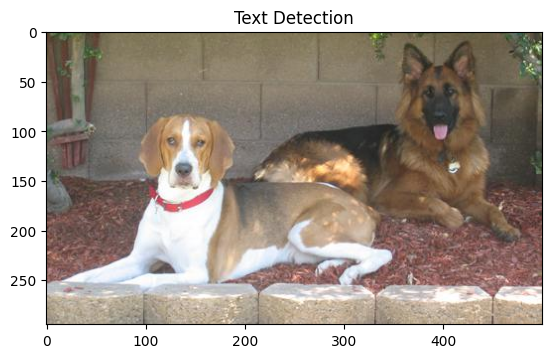

Detected Texts: []
Other object detected


In [69]:
def detect_text_keras_ocr(image_path):
    # Create a pipeline
    # สร้าง Pipeline สำหรับ Keras OCR เพื่อใช้ในการตรวจจับข้อความ
    pipeline = keras_ocr.pipeline.Pipeline()

    # Load the image
    # อ่านภาพจากที่อยู่ที่กำหนด
    img = cv2.imread(image_path)

    # Perform OCR
    # ใช้ Pipeline ที่สร้างขึ้นเพื่อตรวจจับข้อความในภาพ
    prediction_groups = pipeline.recognize([img])

    # Initialize a list to hold detected texts
    detected_texts = []  
    for predictions in prediction_groups:
        for text, box in predictions:
            # Append detected text to the list
            detected_texts.append(text)
            # Draw bounding boxes (optional)
            # วาดกรอบรอบข้อความที่ตรวจจับได้ (เป็นทางเลือก)
            box = np.array(box, dtype=int)  # แปลงกรอบเป็นรูปแบบจำนวนเต็ม
            cv2.polylines(img, [box], isClosed=True, color=(0, 255, 0), thickness=2)  # วาดกรอบ

    # Use matplotlib to display the image
    # ใช้ matplotlib แสดงภาพที่มีกรอบข้อความ
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # เปลี่ยนสี BGR เป็น RGB
    plt.title("Text Detection")  # กำหนดชื่อเรื่องของภาพ
    plt.show()  # แสดงภาพ

    # Print detected texts
    # แสดงข้อความที่ตรวจจับได้
    print("Detected Texts:", detected_texts)
    
    # Check if 'Yims' is in the detected text (case insensitive)
    # ตรวจสอบว่ามีคำว่า 'Yims' หรือ 'yims' อยู่ในข้อความที่ตรวจจับได้หรือไม่
    if any("Yims" in text or "yims" in text for text in detected_texts):
        print("Yims Cafe Glass detected!")  # ถ้ามี 'Yims' แสดงว่าเป็นแก้วของ Yims
    else:
        print("Other object detected")  # ถ้าไม่มี 'Yims' แสดงว่าเป็นวัตถุอื่น

# Example usage
# เรียกใช้ฟังก์ชันเพื่อตรวจจับข้อความในภาพ
detect_text_keras_ocr("unseen_dataset/8749.jpg")


Test with Scan Qr-Code (**Not Working for this time**)
### ปัญหาที่พบ
จากการทดสอบมีหลายภาพและพบว่าไม่สามารถใช้งานได้จริง อาจจะเกิดจากปัญหาต่าง ๆ เช่น การไม่สามารถตรวจจับ QR code ได้ในบางกรณี หรือปัญหาในการโหลดภาพ

No QR Code detected


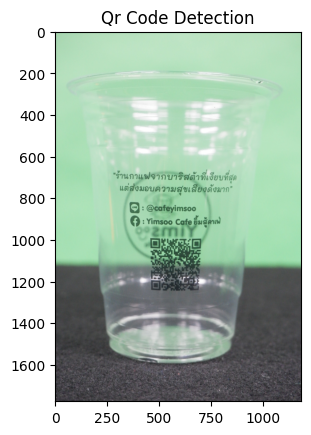

In [149]:
def scan_qr_code(image_path):
    # โหลดภาพจากที่อยู่ที่กำหนด โดยใช้ OpenCV
    img = cv2.imread(image_path)

    # ตรวจจับ QR code ในภาพด้วยไลบรารี pyzbar
    qrcodes = pyzbar.decode(img)
    
    # ตรวจสอบว่ามี QR code ตรวจจับได้หรือไม่
    if qrcodes:
        # ถ้ามี QR code ตรวจจับได้ ให้วนลูปผ่านแต่ละ QR code
        for qrcode in qrcodes:
            (x, y, w, h) = qrcode.rect  # รับพิกัดกรอบของ QR code
            # วาดกรอบสี่เหลี่ยมรอบ QR code ที่ตรวจจับได้
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            # รับข้อมูลจาก QR code ที่ตรวจจับได้
            qr_data = qrcode.data.decode('utf-8')  # แปลงข้อมูล QR code เป็นข้อความ
            print(f"Detected QR Code: {qr_data}")  # แสดงข้อมูล QR code ที่ตรวจจับได้
            
            # ตรวจสอบว่ามี QR code ที่ต้องการอยู่ในข้อมูลหรือไม่
            if "Yims" in qr_data:  # ถ้ามีคำว่า "Yims" ในข้อมูล QR code
                print("Yims Cafe QR Code detected!")  # แสดงข้อความเมื่อพบ QR code ของ Yims
            else:
                print("Other QR Code detected")  # ถ้าไม่พบ QR code ของ Yims แสดงว่าเป็น QR code อื่น
    
    else:
        print("No QR Code detected")  # ถ้าไม่มี QR code ตรวจจับได้ แสดงข้อความ

    # ใช้ matplotlib เพื่อแสดงภาพที่มีกรอบ QR code
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # เปลี่ยนสีจาก BGR เป็น RGB
    plt.title("Qr Code Detection")  # ตั้งชื่อให้กับภาพ
    plt.show()  # แสดงภาพ

# ตัวอย่างการใช้งาน
scan_qr_code("dataset/yims/image (18).JPG")  # เรียกใช้ฟังก์ชันเพื่อตรวจจับ QR code ในภาพ
